In [45]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
experiments, outcomes = load_results("data/generated/genscen_Overijssel_30_05-06-2021-18-39-58.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Overijssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]

In [62]:
norm_outcomes = preprocessing.normalize(pd.DataFrame(outcomes))

In [49]:
pca = PCA(n_components=1)
pca.fit(norm_outcomes.T)
y = pd.Series(pca.components_[0])
x = experiments[uncertainties]

In [66]:
prim_alg = prim.Prim(x, y < 0.1, threshold=0.9)

In [67]:
box1 = prim_alg.find_box()

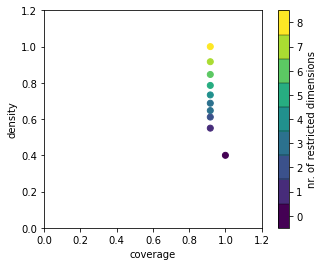

In [68]:
box1.show_tradeoff()
plt.show()

coverage    0.916667
density         0.55
id                 1
mass        0.666667
mean            0.55
res_dim            1
Name: 1, dtype: object

                box 1                                         
                  min         max                    qp values
A.1_Brate  {1.5, 1.0}  {1.5, 1.0}  [0.12752124614721666, -1.0]



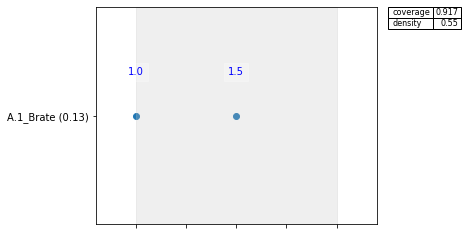

In [69]:
box1.inspect(1)
box1.inspect(1, style='graph')
plt.show()

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


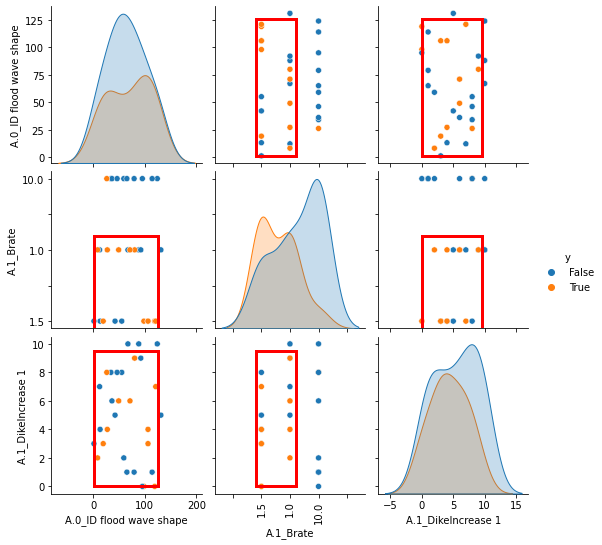

In [70]:
box1.select(3)
box1.show_pairs_scatter()